# Insurance Data Linear Regresssion Project (EDA, Data Clean, R^2 :0.776)

Hi, 

I'm new to Data Science and I have created this notebook as a practice. Any comments and suggests is highly appreciated!
This note book is heavily influenced by the style and structure of: https://www.kaggle.com/barisscal/diamonds-linear-regression-and-metrics-98/notebook#EDA-and-Linear-Regression-with-Evaluation-Metrics-on-Diamonds-Dataset

This project uses linear regression to predict the insurance charges based on features such as age, sex, region, and other health related issues and habits.

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#locate the data
import os

for folder,sub, file in os.walk('input/'):
    for f in file:
        print(folder+f)

input/insurance.csv


In [3]:
# read the data
df = pd.read_csv('input/insurance.csv')

In [4]:
#check out the head of the data
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# no missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# EDA

In [6]:
#catgorical data
categorical = (df.dtypes == 'object')
cats = list(categorical[categorical].index)
cats

['sex', 'smoker', 'region']

In [7]:
#create a function that make count&pie plots
def countpieplots(cats):
    my_explodes = [0.05,0.05],[0.05,0.05], [0.05,0.05,0.05,0.05]
    for i in range(len(cats)):
        plt.figure(figsize=(9,3))
        plt.subplot(1,2,1)
        plt.title(cats[i])
        sns.countplot(df[cats[i]], palette='magma')
        plt.subplot(1,2,2)
        plt.pie(df[cats[i]].value_counts(), shadow=True, explode = my_explodes[i], startangle=90, 
                labels=df[cats[i]].value_counts().index, autopct = '%1.f%%')
        plt.show()
        print('Counts:')
        print(f'{df[cats[i]].value_counts()}')
        plt.savefig('countpie.png')

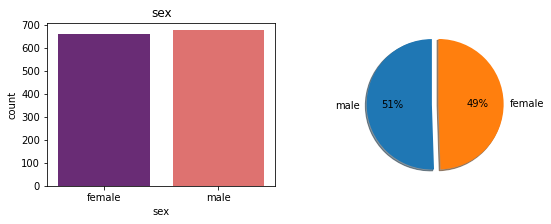

Counts:
male      676
female    662
Name: sex, dtype: int64


<Figure size 432x288 with 0 Axes>

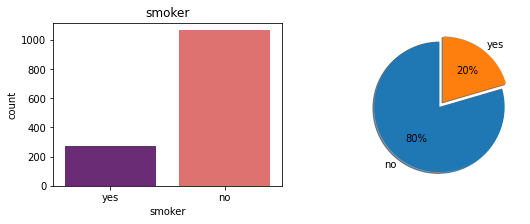

Counts:
no     1064
yes     274
Name: smoker, dtype: int64


<Figure size 432x288 with 0 Axes>

In [ ]:
countpieplots(cats)

>note: apart from the fact that there are much more non smokers than smokers, every other data are distributed quite evenly.

In [ ]:
#numerical data
numerical = (df.dtypes != 'object')
nums = list(numerical[numerical].index)
nums

In [ ]:
#Create violin plots for the numerical data
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.violinplot(df['age'], color='red')

plt.subplot(2,2,2)
sns.violinplot(df['bmi'], color='blue')

plt.subplot(2,2,3)
sns.violinplot(df['children'], color = 'green')

plt.subplot(2,2,4)
sns.violinplot(df['charges'], color = 'yellow')

Age: Ranging from 10 - 70, with the mean of 40, no obvious outlier based on the distribution shape.

BMI: Average at 30.

Children: Most people have no children and not many have more than 3.

Charges: Mostly around 10,000 and far less higher than 20,000.

# Age - Charges

In [ ]:
plt.figure(figsize=(12,8))
sns.jointplot(df['age'],df['charges'])

> Above we can see a jointplot between age and charges.
>> As we can see, charges with association to ages are divided into 3 groups and in each as you get older, your charges get higher which does make intuitive sense. These three levels division is probably due to other variables since as children and smoking habit.

# bmi - Charges

In [ ]:
sns.jointplot(df['bmi'],df['charges'])

>Above we can see the joint plot between  charges and bmi.
>> bmi is normally distributed but charges is left skewed. The means that as bmi increase charges do not necessary do. Although this is only true for charges lower than around 15,000. After that there seems to be a slight association where as you bmi increases, so does your charges. This might indicate that for people with lower charges bmi is not a diciding factor of charges.

# Sex -Charges

In [ ]:
sns.barplot(df['sex'],df['charges'], palette='Set3')

>Above we can see the barplot between the two sexes and their charges.
>> interstingly males seem to have higher charges than females.

# Children - Charges

In [ ]:
sns.barplot(df['children'],df['charges'], palette='Set3')

>Above we can the bar plot between the number of children and the charges associated
>> As we can see, mostly, people with 3 and 2 children seem to have the highest charges. Although the higest amount of charge belongs to someone with 4 children. One child and no childern have very similar charges with only a slight difference. Interestingly people with 5 children have the lowest charges. From this graph we can see that as the number of children goes up, so does charges but only until 3 children because after that the charges seem to decline. 

# Smoker - Charges 

In [ ]:
sns.barplot(df['smoker'],df['charges'], palette='Set3')

>Above we can see the charges of smokers and nonsmokers
>> Not surprisingly, the charges for smokers are significantlt higher more than 30,000. While the for non smokers, it could go up to only around 10,000.

# Region - Charges

In [ ]:
sns.barplot(df['region'],df['charges'], palette='Set3')

> Here we can see the barplot between regions and charges
>> People in the southeast has the highest charges, follow by northeast and lastly southwest and northwest.

# Panda Profilling

Here, I have genereated a Profile Report with Pandas Profilling. This provides a nice interactive overview of the data and it is a quick way to see what the data looks like as a whole.

In [ ]:
import pandas_profiling as PP
PP.ProfileReport(df)

In [ ]:
#code from https://seaborn.pydata.org/examples/kde_ridgeplot.html

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(n_colors=10, light=0.7, rot=-0.5)

g = sns.FacetGrid(df, row ='children', hue='children', height=1, aspect=15, palette=pal)

g.map(sns.kdeplot,'charges', fill=True, alpha =1, bw_adjust= .5)
g.map(sns.kdeplot, "charges", color="w", lw=2, bw_adjust=.5)

def label(x,color,label):
    ax=plt.gca()
    ax.text(0,.22,label, color=color, transform=ax.transAxes)
    
g.map(label, 'charges')

g.map(plt.axhline, y= 0, lw=4)

g.figure.subplots_adjust(hspace=-.25)

g.set_titles('')
g.set_ylabels('')
g.set_yticklabels([])

g.despine(bottom=True, left=True)

plt.savefig('overlap.png')

>Here you can see distribution plots of children and charges
>> Here we take a closer look at children and charges. As we can see most people have the charges around less than 20,000 regardless of the number of children and after that only a small amount of people are above 30,000 regard less of the number of children. To me, according to this graph, the number of children doesn't seem to have a significant impact on the charges of most people.

# Outliers

Here we uses Interquatile Range in order to detect outliers. I consider outliers which appear in at least 2 columns for the same row as outliers. These rows are later deleted from the dataframe.

In [ ]:
#Import
from collections import Counter

In [ ]:
#Create a function that detect outlier
def outliers(df, variables):
    outlier_index = []
    
    for c in variables:
        #Get Q1 and Q3
        Q1 = np.quantile(df[c],0.25)
        Q3 = np.quantile(df[c],0.75)
        # Get IQR
        IQR = Q3-Q1
        IQR_adj = IQR*1.5
        # Find index of the value which are lower than Q1-(IQR*1.5) or higher than Q3+(IQR*1.5)
        outliers = list(df[(df[c] < Q1 - IQR_adj) | (df[c] > Q3 + IQR_adj)].index)
        outlier_index.extend(outliers)
     
    outlier_index = Counter(outlier_index).items()
    
    #Only return the index that appear more than 2 times from two differen columns
    return list(i for i,v in outlier_index if v >= 2)

In [ ]:
#show the outliers
df.iloc[outliers(df, ['age','bmi','children','charges'])]

In [ ]:
#Drop the outliers
df = df.drop(outliers(df, ['age','bmi','children','charges']), axis = 0).reset_index(drop=True)

# Skewness

Here we check out the skewness and peakness of the dataset. Then we transform the necessary data with boxcox transformation in order to make the data more normally distributed so that it fit the linear regression model better. Most of the data in this dataframe are already not very skewed so I have only done this on two columns; age and charges.

In [ ]:
#import 
from scipy.stats import norm, boxcox

In [ ]:
df.agg(['skew','kurtosis']).transpose()

>Above table shows the skewness and kurtosis(peakness) of the data. 
>> The higher the skew, the more left skewed it is, if the number is negative then it is right skewed. Normal distribution has skewness of 0. As for kurtosis, the higher the value. the more tall and thin the graph is and if the number is negative then the data will be more flat. Again, normal distribution has the kurtosis of 0.

# Age

In [ ]:
#Show original data
plt.figure(figsize=(6,4))
sns.distplot(df['age'], fit=norm).set_title('Skewed')

print(f'mu: {np.mean(df["age"])}, sigma: {np.std(df["age"])}')

In [ ]:
#show transformed data
df['age'], lam = boxcox(df['age'])

sns.distplot(df['age'], fit=norm).set_title('Transformed')

print(f'mu: {np.mean(df["age"])}, sigma: {np.std(df["age"])}')

# Charges

In [ ]:
#Show original data
sns.distplot(df['charges'], fit=norm).set_title('Skewed')

print(f'mu: {np.mean(df["charges"])}, sigma: {np.std(df["charges"])}')

In [ ]:
#show transformed data
df['charges'], lam = boxcox(df['charges'])

sns.distplot(df['charges'], fit=norm).set_title('Transformed')

print(f'mu: {np.mean(df["charges"])}, sigma: {np.std(df["charges"])}')

# Correlation

In [ ]:
sns.heatmap(df.corr(), annot=True)

> Above we have the heatmap of correlation of the data
>> Age and charges seems to have the highest correlation of 0.52 while the rest do not seem to have much correlation at all.

# Dummies Variables

Here I turn categorical data into dummies variables. Since our linear model, that we will use later on, cannot accept non-numerical values.

In [ ]:
#Get the unique values for each categorical data
cat_var = ['sex', 'smoker', 'region']

for c in cat_var:
    print(f'Unique Values for {c}: {df[c].unique()}')

In [ ]:
#Get dummies and drop the original columns
for c in cat_var:
    dummies = pd.get_dummies(df[c], prefix=f'{c}_')
    df.drop(c, axis =1, inplace = True)
    df = pd.concat([df, dummies], axis =1)

In [ ]:
#Heat map of the transformed data
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.savefig('heat.png')

# Train Test Split

In [ ]:
#Import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Define x and y
X = df.drop('charges', axis =1)
y = df['charges']

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Scale the data using StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 

In [ ]:
#Import 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#Show the parameters from linear regression
LinearRegression().get_params()

In [ ]:
#Use GridSearchCV in order to optimized the parameters of linear regression
parameters = {'copy_X': [True,False],
 'fit_intercept': [True,False],
 'positive': [True,False]}


cv = GridSearchCV(LinearRegression(),parameters,n_jobs=-1,cv=15,verbose=2).fit(X_train,y_train)

print(f'The best score: {cv.best_score_*100}')
print(f'The best estimators: {cv.best_estimator_}')
print(f'The best parameters{cv.best_params_}')

In [ ]:
# Train and predict the data using linear regression with the parameters that we found
linear = LinearRegression(fit_intercept=True,copy_X=True,positive=True)

linear.fit(X_train,y_train)
pred = linear.predict(X_test)

print(f'Train score: {linear.score(X_train, y_train)}')
print(f'Test score: {linear.score(X_test, y_test)}')

In [ ]:
#Joint plot of the prediction and y_test
sns.jointplot(y_test,pred, kind='reg', line_kws={'color':'red'})

# Evaluations

I have decided to used Mean Absolute Error, Mean Squared Error, Root Mean Square Error and R^2 as the metrics for evaluating out model. 

In [ ]:
#import
import sklearn.metrics as met

# Mean Absolute Error

In [ ]:
print(f'MAE: {met.mean_absolute_error(y_test,pred)}')

>This gives you the mean of the absolute error of the data. MAE is easy to interpret because it has the unit as value as the data. In our case, we can say that on average our model's prediction distance from the real charges by 0.41 dollars. Since this is the measurement of errors, the lower the value the better

# Mean Square Error

In [ ]:
print(f'MSE: {met.mean_squared_error(y_test,pred)}')

>This gives us the average of the squared value of the errors and because it we sqaure the errors before taking the mean, the value do punish outliers more than MAE. This, however, does not have the same unit as the real values and cannot be interpreted in the same manner. However, this is still a measurement of error which means the lower the value the better the model is. 

# Root Mean Square Error

In [ ]:
print(f'RMSE: {np.sqrt(met.mean_squared_error(y_test,pred))}')

>This is basically the square root of the mean square error. This makes the value the same unit as the real value again making it easier to interpret. In our cause, accorinding to the RMSE, our model distances from the real value by 0.66 dollars.

# R^2

In [ ]:
print(f'R^2: {met.r2_score(y_test,pred)}')

>This value is the measurement of the correlation between the real values and the values predicted by our model. Since it measures the association and not the errors, the lower the value does not mean better model. Instead R^2 goes up to 1 and the closer to 1 you are the better the model is. In our case, we have the score of 0.776